### Ref. Datacamp

#### Goal: Find the best KPI and do A/B testing

Data files: 

1. 'customerData.csv' -- demographics data of the customers who registered for a particular meditation app. 

2. After the free trial period has ended, customers can purchase a subscription. This data is in the 'inappPurchases.csv' file.

In [9]:
import pandas as pd

In [34]:
customerData = pd.read_csv('./datasets/customerData.csv', header=1)

In [35]:
customerData.head()

,Unnamed: 0,uid,reg_date,device,gender,country,age
0,NaN,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19
1,NaN,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,NaN,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16
3,NaN,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41
4,NaN,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [36]:
customerData.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
customerData.head()

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [19]:
customerData.dtypes

uid         float64
reg_date     object
device       object
gender       object
country      object
age           int64
dtype: object

In [14]:
inAppPurchases = pd.read_csv('./datasets/inappPurchases.csv')

In [15]:
inAppPurchases.head()

,Unnamed: 0,date,uid,sku,price,Unnamed: 5,Unnamed: 6
0,NaN,2017-07-10,41195147,sku_three_499,499,NaN,NaN
1,NaN,2017-07-15,41195147,sku_three_499,499,NaN,NaN
2,NaN,2017-11-12,41195147,sku_four_599,599,NaN,NaN
3,NaN,2017-09-26,91591874,sku_two_299,299,NaN,NaN
4,NaN,2017-12-01,91591874,sku_four_599,599,NaN,NaN


In [20]:
inAppPurchases.drop(['Unnamed: 0', 'Unnamed: 5', 'Unnamed: 6'], axis = 'columns', inplace=True)

In [21]:
inAppPurchases.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [22]:
inAppPurchases.dtypes

date     object
uid       int64
sku      object
price     int64
dtype: object

In [24]:
uidPurchasesjoined = inAppPurchases.merge(customerData, on = ['uid'], how='inner')

In [25]:
uidPurchasesjoined.head()

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26T00:00:00Z,and,M,BRA,17
2,2017-11-12,41195147,sku_four_599,599,2017-06-26T00:00:00Z,and,M,BRA,17
3,2017-09-26,91591874,sku_two_299,299,2017-01-05T00:00:00Z,and,M,TUR,17
4,2017-12-01,91591874,sku_four_599,599,2017-01-05T00:00:00Z,and,M,TUR,17


In [26]:
uidPurchasesjoined.shape

(9006, 9)

In [38]:
customerData.head()

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59


In [39]:
customerData['reg_date_formatted'] = customerData['reg_date'].apply(lambda x: x[:10])

In [40]:
customerData.head()

,uid,reg_date,device,gender,country,age,reg_date_formatted
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19,2017-06-29
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22,2018-03-05
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16,2016-02-07
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-25
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59,2017-03-26


In [41]:
uidPurchasesSameDayjoined = inAppPurchases.merge(customerData, left_on=['uid', 'date'], \
                                                right_on=['uid', 'reg_date_formatted'], how='inner')

In [42]:
uidPurchasesSameDayjoined.head()

,date,uid,sku,price,reg_date,device,gender,country,age,reg_date_formatted
0,2016-03-30,94055095,sku_four_599,599,2016-03-30T00:00:00Z,iOS,F,BRA,16,2016-03-30
1,2015-10-28,69627745,sku_one_199,199,2015-10-28T00:00:00Z,and,F,BRA,18,2015-10-28
2,2017-02-02,11604973,sku_seven_1499,499,2017-02-02T00:00:00Z,and,F,USA,16,2017-02-02
3,2016-06-05,22495315,sku_four_599,599,2016-06-05T00:00:00Z,and,F,USA,19,2016-06-05
4,2018-02-17,51365662,sku_two_299,299,2018-02-17T00:00:00Z,iOS,M,TUR,16,2018-02-17


In [43]:
uidPurchasesSameDayjoined.shape

(35, 10)

** Datetime gymanstics **

In [44]:
uidPurchasesjoined.dtypes

date        object
uid         object
sku         object
price        int64
reg_date    object
device      object
gender      object
country     object
age          int64
dtype: object

In [45]:
uidPurchasesjoined['date'] = pd.to_datetime(uidPurchasesjoined['date'])

In [47]:
uidPurchasesjoined['reg_date'] = pd.to_datetime(uidPurchasesjoined['reg_date'])

In [48]:
uidPurchasesjoined.dtypes

date        datetime64[ns]
uid                 object
sku                 object
price                int64
reg_date    datetime64[ns]
device              object
gender              object
country             object
age                  int64
dtype: object

In [52]:
uidPurchasesjoined['subscription_time'] = uidPurchasesjoined['date'] - uidPurchasesjoined['reg_date'] 

In [53]:
uidPurchasesjoined.head()

,date,uid,sku,price,reg_date,device,gender,country,age,subscription_time
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,14 days
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,19 days
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,139 days
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,264 days
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,330 days


In [54]:
uidPurchasesjoined['subscription_time_days'] = uidPurchasesjoined['subscription_time'].dt.days

In [55]:
uidPurchasesjoined.head()

,date,uid,sku,price,reg_date,device,gender,country,age,subscription_time,subscription_time_days
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,14 days,14
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,19 days,19
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,139 days,139
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,264 days,264
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,330 days,330


In [56]:
uidJoinedLessThan7days = uidPurchasesjoined[uidPurchasesjoined.subscription_time_days < 7]

In [57]:
uidJoinedLessThan7days.shape

(197, 11)

In [58]:
len(uidJoinedLessThan7days)

197

In [59]:
len(uidPurchasesjoined)

9006

In [60]:
customerData.head()

,uid,reg_date,device,gender,country,age,reg_date_formatted
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19,2017-06-29
1,72574201.0,2018-03-05T00:00:00Z,iOS,F,TUR,22,2018-03-05
2,64187558.0,2016-02-07T00:00:00Z,iOS,M,USA,16,2016-02-07
3,92513925.0,2017-05-25T00:00:00Z,and,M,BRA,41,2017-05-25
4,99231338.0,2017-03-26T00:00:00Z,iOS,M,FRA,59,2017-03-26


In [61]:
inAppPurchases.head()

,date,uid,sku,price
0,2017-07-10,41195147,sku_three_499,499
1,2017-07-15,41195147,sku_three_499,499
2,2017-11-12,41195147,sku_four_599,599
3,2017-09-26,91591874,sku_two_299,299
4,2017-12-01,91591874,sku_four_599,599


In [62]:
purchasePriceMean = inAppPurchases.price.mean()

In [63]:
purchasePriceMean

406.77259604707973

In [64]:
inAppPurchases.price.agg('mean')

406.77259604707973

In [65]:
purchasePriceSummary = inAppPurchases.price.agg(['mean', 'median'])

In [66]:
purchasePriceSummary

mean      406.772596
median    299.000000
Name: price, dtype: float64

In [67]:
uidPurchasesjoined.head()

,date,uid,sku,price,reg_date,device,gender,country,age,subscription_time,subscription_time_days
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,14 days,14
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,19 days,19
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,139 days,139
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,264 days,264
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,330 days,330


In [68]:
uidPurchasesjoined.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

,price,age
mean,406.772596,23.922274
median,299.000000,21.000000


** Grouping and aggregating **

In [106]:
uidPurchasesjoined.groupby(by = ['device', 'gender']).agg({'price': ['mean', 'median', 'std']})

price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197

#### Calculating KPI: 

As a example, we will look at the average amount paid per purchase within a user's first 28 days.

This KPI can provide a sense of the popularity of different in-app purchase price points to users within their first month.

In [83]:
from datetime import datetime, timedelta

In [95]:
currDate = pd.Timestamp(2018, 3, 17, 0, 0, 0)

In [96]:
currDate

Timestamp('2018-03-17 00:00:00')

Filter out all users who registered in less than 28 days from the currDate

In [99]:
uidPurchasesFiltered = uidPurchasesjoined[uidPurchasesjoined['reg_date'] < currDate - timedelta(days=28)]

In [101]:
uidPurchasesFiltered.head()

,date,uid,sku,price,reg_date,device,gender,country,age,subscription_time,subscription_time_days
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,14 days,14
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,19 days,19
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,139 days,139
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,264 days,264
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,330 days,330


In [108]:
uidPurchasesjoined.shape

(9006, 11)

Filter to contain only purchases within the first 28 days of registration

In [115]:
uidPurchasesFiltered2 = uidPurchasesFiltered[(uidPurchasesFiltered['date'] <= uidPurchasesFiltered.reg_date + timedelta(days=28))]

In [116]:
uidPurchasesFiltered.shape

(8957, 11)

In [117]:
uidPurchasesFiltered2.shape

(590, 11)

In [118]:
uidPurchasesFiltered2.price.mean()

414.4237288135593

In [119]:
currDate

Timestamp('2018-03-17 00:00:00')

In [121]:
import numpy as np

In [122]:
month1 = np.where((uidPurchasesjoined.reg_date < currDate - timedelta(days=28)) & 
                  (uidPurchasesjoined.date < uidPurchasesjoined.reg_date + timedelta(days=28)), 
                  uidPurchasesjoined.price, np.nan)

In [123]:
uidPurchasesjoined['month1'] = month1

In [125]:
uidPurchasesjoined.head(10)

,date,uid,sku,price,reg_date,device,gender,country,age,subscription_time,subscription_time_days,month1
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,14 days,14,499.0
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,19 days,19,499.0
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,139 days,139,NaN
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,264 days,264,NaN
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,330 days,330,NaN
5,2016-12-12,90783242,sku_two_299,299,2016-10-07,and,M,BRA,17,66 days,66,NaN
6,2017-06-12,90783242,sku_one_199,199,2016-10-07,and,M,BRA,17,248 days,248,NaN
7,2017-10-11,90783242,sku_five_899,899,2016-10-07,and,M,BRA,17,369 days,369,NaN
8,2017-10-27,90783242,sku_four_599,599,2016-10-07,and,M,BRA,17,385 days,385,NaN
9,2018-01-04,90783242,sku_one_199,199,2016-10-07,and,M,BRA,17,454 days,454,NaN


In [127]:
uidPurchasesjoined.groupby(by = ['device','gender'], as_index=False).agg({'month1': ['mean', 'median'], \
                                                                         'price': ['mean', 'median']})

device gender      month1              price       
                       mean median        mean median
0    and      F  388.204545  299.0  400.747504    299
1    and      M  413.705882  399.0  416.237308    499
2    iOS      F  432.587786  499.0  404.435330    299
3    iOS      M  433.313725  499.0  405.272401    299

**Parsing date time formats in Python**

In [128]:
example1 = "Saturday January 27, 2017"

In [129]:
pd.to_datetime("Saturday January 27, 2017", format='%A %B %d, %Y')

Timestamp('2017-01-27 00:00:00')

In [134]:
pd.to_datetime("Saturday January 27, 2017", format='%A %B %d, %Y').dayofweek

4

In [135]:
pd.to_datetime('2017-08-01', format='%Y-%m-%d')

Timestamp('2017-08-01 00:00:00')

In [136]:
pd.to_datetime("08/17/1978", format='%m/%d/%Y')

Timestamp('1978-08-17 00:00:00')

In [138]:
pd.to_datetime("2016 March 01 01:56", format='%Y %B %d %H:%M')

Timestamp('2016-03-01 01:56:00')

**Plotting time series data**

In [142]:
uidPurchasesjoined["first_week_purchases"] = np.where(uidPurchasesjoined.subscription_time_days < 7, \
                                         uidPurchasesjoined.subscription_time_days, np.nan)

In [187]:
uidPurchasesjoined.shape

(9006, 13)

In [151]:
userPurchasesFirstWeek = uidPurchasesjoined.groupby(by = ['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

In [152]:
userPurchasesFirstWeek.shape

(1322, 1)

In [153]:
userPurchasesFirstWeek.head()

,,first_week_purchases
,,sum
reg_date,uid,
2015-01-27,27462048,NaN
2015-02-01,43346610,NaN
2015-02-09,46828176,NaN
2015-02-10,26610027,NaN
2015-03-01,93873145,NaN


In [149]:
userPurchasesFirstWeek.columns

MultiIndex(levels=[['first_week_purchases'], ['sum']],
           labels=[[0], [0]])

In [154]:
userPurchasesFirstWeek.columns.droplevel(level=1)

Index(['first_week_purchases'], dtype='object')

In [155]:
userPurchasesFirstWeek.columns = userPurchasesFirstWeek.columns.droplevel(level=1)

In [157]:
userPurchasesFirstWeek

,,first_week_purchases
reg_date,uid,
2015-01-27,27462048,NaN
2015-02-01,43346610,NaN
2015-02-09,46828176,NaN
2015-02-10,26610027,NaN
2015-03-01,93873145,NaN
2015-03-04,20510671,NaN
2015-03-18,69831853,NaN
2015-03-28,68728550,NaN
2015-04-05,78662707,NaN


In [158]:
userPurchasesFirstWeek.reset_index(inplace=True)

**Let's find the average amount purchased by per user per day**

In [160]:
userPurchasesFirstWeek = userPurchasesFirstWeek.groupby(by=['reg_date']).agg({'first_week_purchases': 'mean'})

In [165]:
userPurchasesFirstWeek.reset_index(inplace=True)

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

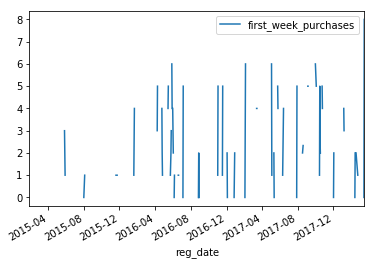

In [171]:
userPurchasesFirstWeek.plot(x = 'reg_date', y = 'first_week_purchases');

In [172]:
uidPurchasesjoined.columns

Index(['date', 'uid', 'sku', 'price', 'reg_date', 'device', 'gender',
       'country', 'age', 'subscription_time', 'subscription_time_days',
       'month1', 'first_week_purchases'],
      dtype='object')

In [177]:
userPurchasesCountry = uidPurchasesjoined.groupby(by = ['reg_date','country'], as_index=False).agg({'first_week_purchases': 'mean'}, )

In [180]:
userPurchasesCountry.head()

,reg_date,country,first_week_purchases
0,2015-01-27,USA,NaN
1,2015-02-01,BRA,NaN
2,2015-02-09,USA,NaN
3,2015-02-10,USA,NaN
4,2015-03-01,USA,NaN


In [184]:
countryPivot = pd.pivot_table(userPurchasesCountry, columns='country', values = 'first_week_purchases', index='reg_date')

In [186]:
countryPivot.head()

country,BRA,CAN,DEU,FRA,TUR,USA
reg_date,,,,,,
2015-01-27,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-09,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-10,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
countryPivot.shape

(739, 6)

### A/B testing

**First let's define the experimental units and baseline values**

Practice calculating experimental units and baseline values related to consumable paywall. Both measure revenue only among users who viewed a paywall. Job is to calculate revenue per user-day, with user-day as the experimental unit.

In [198]:
purchaseData = pd.read_csv('./datasets/purchaseData.csv', header=1)

In [199]:
purchaseData.head()

,Unnamed: 0,date,uid,sku,price,Unnamed: 5,Unnamed: 6
0,NaN,2018-03-14,84715271.0,sku_two_299,299,NaN,NaN
1,NaN,2018-03-16,84715271.0,sku_two_299,299,NaN,NaN
2,NaN,2018-03-25,84715271.0,sku_one_199,199,NaN,NaN
3,NaN,2018-04-07,84715271.0,sku_four_599,599,NaN,NaN
4,NaN,2018-04-19,84715271.0,sku_one_199,199,NaN,NaN


In [201]:
purchaseData.drop(['Unnamed: 0', 'Unnamed: 5', 'Unnamed: 6'], axis = 'columns', inplace=True)

In [204]:
purchaseData.dtypes

date      object
uid      float64
sku       object
price      int64
dtype: object

In [205]:
purchaseData['date'] = pd.to_datetime(purchaseData['date'])

In [214]:
purchaseData.price.isnull().sum()

0

In [215]:
purchaseDataAgg = purchaseData.groupby(by = ['uid', 'date'], as_index=False)

In [217]:
revenueUserDay = purchaseDataAgg.sum()

In [219]:
revenueUserDay.head(10)

,uid,date,price
0,11128497.0,2018-01-02,499
1,11128497.0,2018-01-25,299
2,11128497.0,2018-01-27,299
3,11128497.0,2018-01-29,899
4,11128497.0,2018-02-10,499
5,11128497.0,2018-02-14,299
6,11128497.0,2018-02-17,599
7,11128497.0,2018-02-23,299
8,11128497.0,2018-03-05,499
9,11128497.0,2018-03-12,499


In [221]:
revenueUserDay.price.mean()

406.7819170050994

**The metric we use is conversion rate**

In [229]:
paywallViews = pd.read_csv('./datasets/paywallViews.csv', header = 1)

In [230]:
paywallViews.head()

,Unnamed: 0,uid,date,purchase,sku,price,Unnamed: 6
0,NaN,32209877,2016-12-04T14:20:49Z,0,NaN,NaN,NaN
1,NaN,32209877,2016-12-05T22:17:12Z,0,NaN,NaN,NaN
2,NaN,32209877,2016-12-09T17:56:09Z,0,NaN,NaN,NaN
3,NaN,32209877,2016-12-13T03:07:08Z,0,NaN,NaN,NaN
4,NaN,32209877,2016-12-14T17:19:29Z,0,NaN,NaN,NaN


In [231]:
paywallViews.drop(['Unnamed: 0', 'Unnamed: 6'], axis='columns', inplace=True)

In [232]:
paywallViews.head()

,uid,date,purchase,sku,price
0,32209877,2016-12-04T14:20:49Z,0,NaN,NaN
1,32209877,2016-12-05T22:17:12Z,0,NaN,NaN
2,32209877,2016-12-09T17:56:09Z,0,NaN,NaN
3,32209877,2016-12-13T03:07:08Z,0,NaN,NaN
4,32209877,2016-12-14T17:19:29Z,0,NaN,NaN


In [233]:
demographicsData = pd.read_csv('./datasets/demographicsData.csv', header=1)

In [234]:
demographicsData.head()

,Unnamed: 0,uid,reg_date,device,gender,country,age
0,NaN,52774929.0,2018-03-07T00:00:00Z,and,F,FRA,27
1,NaN,84341593.0,2017-09-22T00:00:00Z,iOS,F,TUR,22
2,NaN,41201055.0,2017-11-24T00:00:00Z,and,F,USA,20
3,NaN,68477880.0,2016-12-08T00:00:00Z,and,F,BRA,18
4,NaN,42235969.0,2017-09-30T00:00:00Z,and,F,USA,41


In [235]:
demographicsData.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [236]:
purchaseDataDemographics = demographicsData.merge(paywallViews, how = 'inner', on=['uid'])

In [237]:
purchaseDataDemographics.head()

,uid,reg_date,device,gender,country,age,date,purchase,sku,price
0,8.98564e+07,2017-06-05T00:00:00Z,and,M,TUR,31,2017-06-07T22:34:37Z,0,NaN,NaN
1,8.98564e+07,2017-06-05T00:00:00Z,and,M,TUR,31,2017-06-08T07:36:00Z,0,NaN,NaN
2,8.98564e+07,2017-06-05T00:00:00Z,and,M,TUR,31,2017-06-10T18:14:53Z,0,NaN,NaN
3,8.98564e+07,2017-06-05T00:00:00Z,and,M,TUR,31,2017-06-12T07:25:15Z,0,NaN,NaN
4,8.98564e+07,2017-06-05T00:00:00Z,and,M,TUR,31,2017-06-18T08:36:08Z,1,sku_399,3.99


In [238]:
purchaseDataDemographics.shape

(65498, 10)

In [239]:
purchaseDataDemographics.dtypes

uid          object
reg_date     object
device       object
gender       object
country      object
age           int64
date         object
purchase      int64
sku          object
price       float64
dtype: object

In [245]:
purchaseDataDemographics['reg_date'] = pd.to_datetime(purchaseDataDemographics['reg_date'])

In [246]:
purchaseDataDemographics['date'] = pd.to_datetime(purchaseDataDemographics['date'])

In [247]:
purchaseDataDemographics['date'].head()

0   2017-06-07 22:34:37
1   2017-06-08 07:36:00
2   2017-06-10 18:14:53
3   2017-06-12 07:25:15
4   2017-06-18 08:36:08
Name: date, dtype: datetime64[ns]

In [257]:
purchaseDataDemographics['date'].dt.floor('d').head()

0   2017-06-07
1   2017-06-08
2   2017-06-10
3   2017-06-12
4   2017-06-18
Name: date, dtype: datetime64[ns]

In [258]:
purchaseDataDemographics['date'] = purchaseDataDemographics['date'].dt.floor('d')

In [259]:
purchaseDataDemographics.head()

,uid,reg_date,device,gender,country,age,date,purchase,sku,price
0,8.98564e+07,2017-06-05,and,M,TUR,31,2017-06-07,0,NaN,NaN
1,8.98564e+07,2017-06-05,and,M,TUR,31,2017-06-08,0,NaN,NaN
2,8.98564e+07,2017-06-05,and,M,TUR,31,2017-06-10,0,NaN,NaN
3,8.98564e+07,2017-06-05,and,M,TUR,31,2017-06-12,0,NaN,NaN
4,8.98564e+07,2017-06-05,and,M,TUR,31,2017-06-18,1,sku_399,3.99


In [262]:
dailyPurchaseData = purchaseDataDemographics.groupby(by = 'date', as_index=False).agg({'purchase': ['sum', 'count']})

In [264]:
dailyPurchaseData.head()

date purchase      
                  sum count
0 2015-02-05        0     2
1 2015-02-14        0     1
2 2015-02-21        0     1
3 2015-02-25        0     1
4 2015-02-26        0     1

In [267]:
dailyMeanPurchases = dailyPurchaseData['purchase']['sum'].mean()

In [268]:
dailyMeanViews = dailyPurchaseData['purchase']['count'].mean()

In [269]:
dailyMeanPurchases

2.1543560606060606

In [270]:
dailyMeanViews

62.02462121212121

**Let's calculate the conversion rate**

conversion rate = # purchases / # of times viewed

In [276]:
conversionRate = purchaseDataDemographics.purchase.sum() / purchaseDataDemographics.purchase.count()

In [277]:
conversionRate

0.034733885004122264

**Sensitivity calculations**

Let's do some sensitivity analysis. Sensitivity is the minimum level of change we want to detect. Usually the percentage change that would be meaningful to detect in a variable.

Let's experiment with different sensitivities. 

In [283]:
smallSensitivity = 0.1 
mediumSensitivity = 0.3

In [287]:
smallConversionRate = conversionRate * (1 + smallSensitivity)
mediumConversionRate = conversionRate * (1 + mediumSensitivity)

# Find how many more users per day that translates to
smallPurchases = dailyMeanViews * smallConversionRate
purchaserLiftsmall = smallPurchases - dailyMeanPurchases

mediumPurchases = dailyMeanViews * mediumConversionRate
purchaserLiftmedium = mediumPurchases - dailyMeanPurchases

In [288]:
smallPurchases

2.3697916666666665

In [289]:
purchaserLiftsmall

0.21543560606060597

In [291]:
print(mediumPurchases)
print(purchaserLiftmedium)

2.800662878787879
0.6463068181818183


**Getting the standard error in conversion rate**

In [292]:
n = purchaseDataDemographics.purchase.count()

The variance in the conversion rate is given by the formula below. 

Note that the variance of the Bernoulli distribution is given by p (1 - p).

In [294]:
var = conversionRate * (1 - conversionRate) / n

In [295]:
var

5.118849771999553e-07

In [296]:
std = var**(0.5)

In [297]:
std

0.0007154613736603502

In [301]:
from scipy import stats

In [304]:
def get_power(n, p1, p2, cl):
    
    """
    n is the sample size.
    p1 is the baseline value, p2 is the value with lift included and 
    c1 is the confidence level.
    """
    
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2 - p1)
    bp = (p1 + p2) / 2
    v1 = p1 * (1 - p1)
    v2 = p2 * (1 - p2)
    bv = bp * (1 - bp)
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5)/ 
                            (v1 + v2)**0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5)/
                            (v1 + v2)**0.5)
    power = power_part_one + power_part_two
    return(power)

In [305]:
get_power(1000, 0.1, 0.12, 0.95)

0.29808032538146

In [306]:
get_power(2000, 0.1, 0.12, 0.95)

0.524515256115834

The effect of increasing sample size is to increase power.

In [307]:
get_power(1000, 0.1, 0.12, 0.95)

0.29808032538146

In [308]:
get_power(1000, 0.1, 0.12, 0.8)

0.5621010118690234

The effect of decreasing confidence interval is to increase power.

In [309]:
def get_sample_size(power, p1, p2, cl, max_n=1000000):
    n = 1 
    while n <= max_n:
        tmp_power = get_power(n, p1, p2, cl)

        if tmp_power >= power: 
            return n 
        else: 
            n = n + 100

    return "Increase Max N Value"

In [311]:
# Desired Power: 0.8
# CL: 0.90
# Percent Lift: 0.1
p2 = conversionRate * 1.1
sample_size = get_sample_size(0.8, conversionRate, p2, 0.9)
print(sample_size)

36101


In [312]:
# Desired Power: 0.95
# CL 0.90
# Percent Lift: 0.1
p2 = conversionRate * 1.1
sample_size = get_sample_size(0.95, conversionRate, p2, 0.9)
print(sample_size)

63101


Increased power needs increased sample size.

**p-values**

In [313]:
def get_pvalue(con_conv, test_conv,con_size,  test_size,):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [334]:
def get_ci(value, alpha, sigma):
    
    loc = stats.norm.ppf(1 - alpha/2)
    rng_val = stats.norm.cdf(loc - value/sigma)

    lwr_bnd = value - rng_val
    upr_bnd = value + rng_val 

    return_val = (lwr_bnd, upr_bnd)
    return(return_val)

In [347]:
cont_size = 58583
test_size = 56350

In [348]:
cont_var = (1 - cont_conv) * cont_conv / cont_size
test_var = (1 - test_conv) * test_conv / test_size
cont_conv = 0.090965
test_conv = 0.102005

In [349]:
lift_variance = (1 - cont_conv) * cont_conv / cont_size + (1 - test_conv) * test_conv / test_size
lift_sd = lift_variance**0.5

In [350]:
from matplotlib import mlab

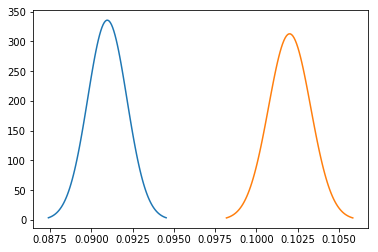

In [351]:
# Compute the standard deviations
control_sd = cont_var**0.5
test_sd = test_var**0.5

# Create the range of x values 
control_line = np.linspace(-3 * control_sd + cont_conv, 3 * control_sd + cont_conv, 100)
test_line = np.linspace(-3 * test_sd + test_conv, 3 * test_sd + test_conv, 100)

# Plot the distribution
plt.plot(control_line, mlab.normpdf(control_line, cont_conv, control_sd))
plt.plot(test_line, mlab.normpdf(test_line, test_conv, test_sd))
plt.show()

In [352]:
lwr_ci, upr_ci = get_ci(lift_mean, 0.95, lift_sd)

In [353]:
lwr_ci

0.011039999822042502

In [354]:
upr_ci

0.011040000177957487

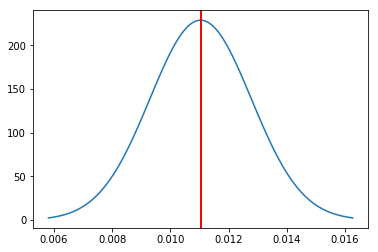

In [355]:
lift_mean = test_conv - cont_conv

lift_sd = (test_var + cont_var) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(-3*lift_sd + lift_mean, 3*lift_sd + lift_mean, 100)

# Plot the distribution 
plt.plot(lift_line, mlab.normpdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = lwr_ci, color = 'red')
plt.axvline(x = upr_ci, color = 'red')
plt.show()